## Objetivos del Proyecto

Los objetivos principales de este proyecto son los siguientes:

**Construir un modelo predictivo** capaz de estimar el precio de un alojamiento en Airbnb con alta precisión.

**Identificar las características más influyentes** en el precio de un alojamiento, como:
   - Ubicación
   - Número de habitaciones
   - Tipo de propiedad

**Optimizar el rendimiento del modelo** mediante técnicas avanzadas:
   - GridSearchCV
   - Selección de características

**Evaluar y analizar los errores del modelo** para entender mejor sus limitaciones y áreas de mejora.



## Instalación de Librerías Necesarias

Para realizar el Análisis Exploratorio el preprocesamiento del dataset y los modelos de procesado, necesitamos las siguientes librerías:

- **Pandas:** para manipulación y análisis de datos.
- **NumPy:** para operaciones matemáticas y manejo de arrays.
- **Matplotlib:** para la visualización gráfica de los datos.
- **Seaborn:** para crear gráficos estadísticos de forma más intuitiva.
- **Scikit-Learn:** para el modelado en Machine Learning 




In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from collections import Counter


Si aún no las tienes instaladas, puedes usar el siguiente comando:

In [ ]:

!pip install numpy pandas matplotlib seaborn scikit-learn collections



## Carga del Dataset

Importamos el conjunto de datos de Airbnb, utilizando el separador `;`. Además, realizamos una primera visualización para entender su estructura:

- `.info()`: Información general sobre las columnas y tipos de datos.
- `.describe()`: Estadísticas generales de las variables numéricas.
- `.head()`: Visualización de las primeras 5 filas del dataset.


In [2]:
data = pd.read_csv('airbnb-listings-extract.csv', sep=';')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14780 entries, 0 to 14779
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              14780 non-null  int64  
 1   Listing Url                     14780 non-null  object 
 2   Scrape ID                       14780 non-null  int64  
 3   Last Scraped                    14780 non-null  object 
 4   Name                            14779 non-null  object 
 5   Summary                         14189 non-null  object 
 6   Space                           10888 non-null  object 
 7   Description                     14774 non-null  object 
 8   Experiences Offered             14780 non-null  object 
 9   Neighborhood Overview           9134 non-null   object 
 10  Notes                           5644 non-null   object 
 11  Transit                         9066 non-null   object 
 12  Access                          

In [4]:
data.describe()

,ID,Scrape ID,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
count,1.478000e+04,1.478000e+04,1.478000e+04,12881.000000,14777.000000,14777.000000,14780.000000,14780.000000,14780.000000,14725.000000,...,14780.000000,11476.000000,11454.000000,11460.000000,11443.000000,11460.000000,11440.000000,11439.000000,14776.000000,11618.000000
mean,1.028089e+07,2.017037e+13,3.608080e+07,94.823461,12.513636,12.513636,40.497626,-3.858041,3.277808,1.281732,...,22.632273,91.697978,9.416012,9.328883,9.621778,9.647033,9.532168,9.218201,9.486871,1.870014
std,5.564829e+06,5.667971e+08,3.425360e+07,15.215988,34.090223,34.090223,4.641387,14.123146,2.097291,0.658517,...,38.290244,8.989101,0.921938,0.989933,0.802736,0.767116,0.774527,0.950578,23.626014,1.867550
min,1.862800e+04,2.016010e+13,1.745300e+04,0.000000,0.000000,0.000000,-37.851182,-123.131344,1.000000,0.000000,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.020000
25%,5.554732e+06,2.017041e+13,6.787360e+06,100.000000,1.000000,1.000000,40.409726,-3.707604,2.000000,1.000000,...,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000,0.450000
50%,1.133492e+07,2.017041e+13,2.464875e+07,100.000000,2.000000,2.000000,40.419466,-3.700785,3.000000,1.000000,...,7.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,2.000000,1.200000
75%,1.532631e+07,2.017041e+13,5.432919e+07,100.000000,6.000000,6.000000,40.430916,-3.684057,4.000000,1.000000,...,27.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.780000
max,1.910969e+07,2.017062e+13,1.247534e+08,100.000000,519.000000,519.000000,55.966912,153.371427,16.000000,8.000000,...,446.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,145.000000,17.210000


In [ ]:
data.head()

### Observaciones iniciales

A partir del análisis inicial con `.info()` y `.describe()`, podemos observar los siguientes puntos importantes:

- El dataset contiene un total de **89 columnas** y **14,780 entradas**.
- Muchas de estas columnas contienen información que no será útil para el modelo de predicción de precios, como:
  - **IDs**: No aportan valor en términos predictivos.
  - **URLs**: Información de referencia que no influye en el precio.
  - **Información del Host**: No aporta relevancia directa al precio del alojamiento.
  - **Información del Scrap**: Datos de recolección que no afectan al modelo.


**Estrategia planteada:**

Dado este escenario, será necesario realizar una selección de características para eliminar aquellas que:

- No aportan valor al modelo (IDs, URLs, etc.).
- Están excesivamente incompletas (demasiados valores nulos).
- Son redundantes o duplicadas.

Estas columnas no aportan información útil para predecir el precio y solo aumentan la complejidad del modelo.

In [58]:
columnas_eliminar =["ID","Name","Summary","Space","Description","Neighborhood Overview","Notes","Interaction","Listing Url","Scrape ID","Last Scraped","Thumbnail Url","Medium Url","Picture Url","XL Picture Url","Host ID","Host URL","Host Name","Host Since","Host Location","Host About","Host Response Time", "Host Response Rate","Host Acceptance Rate","Host Thumbnail Url","Host Picture Url","Host Neighbourhood","Host Listings Count","Host Total Listings Count","Host Verifications","Calendar last Scraped","First Review","Last Review","License","Jurisdiction Names","Calendar Updated"]
data_v1 =  data.drop(columns=columnas_eliminar)
data_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14780 entries, 0 to 14779
Data columns (total 53 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Experiences Offered             14780 non-null  object 
 1   Transit                         9066 non-null   object 
 2   Access                          8318 non-null   object 
 3   House Rules                     9619 non-null   object 
 4   Street                          14780 non-null  object 
 5   Neighbourhood                   9551 non-null   object 
 6   Neighbourhood Cleansed          14780 non-null  object 
 7   Neighbourhood Group Cleansed    13760 non-null  object 
 8   City                            14774 non-null  object 
 9   State                           14636 non-null  object 
 10  Zipcode                         14274 non-null  object 
 11  Market                          14723 non-null  object 
 12  Smart Location                  

Con esta limpieza inicial, hemos reducido el tamaño del dataset, eliminando información irrelevante para el modelo y optimizando la memoria utilizada, pero podemos reducir aun más el dataset facilmente con los campos que contienen bastantes nulos

## Visualización de Valores Nulos

Para identificar las columnas que presentan un alto porcentaje de valores nulos, calculamos el porcentaje de nulos por cada campo. Esto es importante para:

- Detectar columnas con demasiados datos faltantes que podrían perjudicar el modelo.
- Decidir si eliminarlas o realizar un proceso de imputación.

A continuación, visualizamos el porcentaje de nulos:

In [59]:
nulos_porcentaje = (data_v1.isnull().mean() * 100).sort_values()
nulos_porcentaje

Experiences Offered                0.000000
Street                             0.000000
Neighbourhood Cleansed             0.000000
Country Code                       0.000000
Latitude                           0.000000
Smart Location                     0.000000
Property Type                      0.000000
Longitude                          0.000000
Accommodates                       0.000000
Room Type                          0.000000
Guests Included                    0.000000
Bed Type                           0.000000
Availability 30                    0.000000
Maximum Nights                     0.000000
Minimum Nights                     0.000000
Extra People                       0.000000
Number of Reviews                  0.000000
Availability 365                   0.000000
Availability 60                    0.000000
Availability 90                    0.000000
Cancellation Policy                0.000000
Geolocation                        0.000000
Country                         

## Eliminación de Columnas con Más del 35% de Valores Nulos

Para optimizar el modelo y reducir el ruido en los datos, se eliminan aquellas columnas que presentan un **35% o más de valores nulos**.

### Justificación:
- Un alto porcentaje de valores faltantes indica que la información no es confiable o no está disponible en la mayoría de los casos.

- Las columnas `Security Deposit` y `Cleaning Fee` se mantienen porque, aunque tienen un alto porcentaje de nulos, podrían tener un valor conceptual importante para el precio final del alojamiento. Evaluaremos más adelante si es necesario eliminarlas.




In [7]:
columnas_eliminar =["Has Availability","Square Feet","Monthly Price","Weekly Price","Access","Transit","Neighbourhood","House Rules"]
data_v2 =  data_v1.drop(columns=columnas_eliminar)
data_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14780 entries, 0 to 14779
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Experiences Offered             14780 non-null  object 
 1   Street                          14780 non-null  object 
 2   Neighbourhood Cleansed          14780 non-null  object 
 3   Neighbourhood Group Cleansed    13760 non-null  object 
 4   City                            14774 non-null  object 
 5   State                           14636 non-null  object 
 6   Zipcode                         14274 non-null  object 
 7   Market                          14723 non-null  object 
 8   Smart Location                  14780 non-null  object 
 9   Country Code                    14780 non-null  object 
 10  Country                         14779 non-null  object 
 11  Latitude                        14780 non-null  float64
 12  Longitude                       

## Filtro por País: España

El dataset contiene listados de múltiples países, lo cual podría introducir un sesgo significativo en el análisis y en el modelo predictivo. Para simplificar y optimizar el modelo, **nos centramos únicamente en España**, ya que representa la mayoría de los datos y permite un análisis más consistente.

###  **Visualización de la distribución por país:**


In [8]:
country_counts = data_v2['Country'].value_counts()
country_counts

Country
Spain             14001
United States       184
United Kingdom      159
France              110
Italy                68
Australia            46
Ireland              45
Germany              41
Austria              31
Netherlands          26
Canada               20
Belgium              17
Denmark              16
Switzerland           6
Greece                5
Hong Kong             3
Cuba                  1
Name: count, dtype: int64

Filtramos para quedarnos solo con España

In [9]:

data_v2 = data_v2[data_v2['Country'] == 'Spain']
data_v2['Country'].value_counts()

Country
Spain    14001
Name: count, dtype: int64

## Eliminación de Columnas Redundantes

Para reducir la dimensionalidad y eliminar información duplicada, descartamos varias columnas que:
- Contienen información que se encuentra en otras variables de forma más optimizada.
- Son irrelevantes para el modelo predictivo.

**Columnas eliminadas:**
**Experiences Offered** → Todos sus valores son "none", por lo tanto, no aporta información relevante.

**Street, Neighbourhood Group Cleansed, State, Smart Location, Country Code, Country, Geolocation**:
- Estos datos ya están representados en otras columnas como "City", "Neighbourhood Cleansed", "Latitude" y "Longitude".


In [10]:

columnas_redundantes = [
    "Experiences Offered", 
    "Street", "Neighbourhood Group Cleansed", 
    "State", "Smart Location", 
    "Country Code", "Country", "Geolocation"
]
data_v2 = data_v2.drop(columns=columnas_redundantes)
data_v2.info()


<class 'pandas.core.frame.DataFrame'>
Index: 14001 entries, 1 to 14773
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Neighbourhood Cleansed          14001 non-null  object 
 1   City                            13995 non-null  object 
 2   Zipcode                         13540 non-null  object 
 3   Market                          13951 non-null  object 
 4   Latitude                        14001 non-null  float64
 5   Longitude                       14001 non-null  float64
 6   Property Type                   14001 non-null  object 
 7   Room Type                       14001 non-null  object 
 8   Accommodates                    14001 non-null  int64  
 9   Bathrooms                       13949 non-null  float64
 10  Bedrooms                        13977 non-null  float64
 11  Beds                            13952 non-null  float64
 12  Bed Type                        14001

## Análisis de City, Zipcode y Market
Nuestro objetivo es:

1 Identificar valores mal escritos o duplicados.  
2 Evaluar si alguna de estas columnas aporta información duplicada o poco relevante.  
3 Decidir si se estandarizan, se limpian o se eliminan del dataset. 

In [11]:
data_v2['City'].value_counts()


City
Madrid         13207
Barcelona        292
马德里               52
Palma             49
Alcúdia           40
               ...  
Llucalcari         1
Ses Salines        1
Aravaca            1
Cala Murada        1
Son Vida           1
Name: count, Length: 135, dtype: int64

In [12]:
data_v2['Zipcode'].value_counts()


Zipcode
28012    2065
28004    1803
28005    1195
28013    1019
28014     633
         ... 
20126       1
07689       1
07140       1
07640       1
07688       1
Name: count, Length: 204, dtype: int64

In [13]:
data_v2['Market'].value_counts()


Market
Madrid                   13272
Mallorca Island            372
Barcelona                  292
Other (International)       12
London                       1
Toledo                       1
Deauville                    1
Name: count, dtype: int64

## Filtro por Ciudades Principales y Eliminación de Market

Dado que la mayor parte de los datos están concentrados en **Madrid** y **Barcelona**, y el resto de las ciudades tienen muy pocas muestras, optamos por quedarnos únicamente con estos dos mercados para reducir ruido y optimizar el modelo.

Además, eliminamos la columna `Market`, ya que esta información ya está representada correctamente en `City`.




In [14]:
data_v2 = data_v2[data_v2['City'].isin(['Madrid', 'Barcelona'])]
data_v2 = data_v2.drop(columns=['Market'])

In [15]:
data_v2['City'].value_counts()


City
Madrid       13207
Barcelona      292
Name: count, dtype: int64

## Exploración de la Variable Objetivo: Price

Para entender mejor la distribución de precios, generamos un histograma con un suavizado de densidad (KDE) que nos permitirá identificar:
- Asimetrías en los precios.
- Colas largas (valores muy altos).
- Picos que puedan indicar comportamientos atípicos.



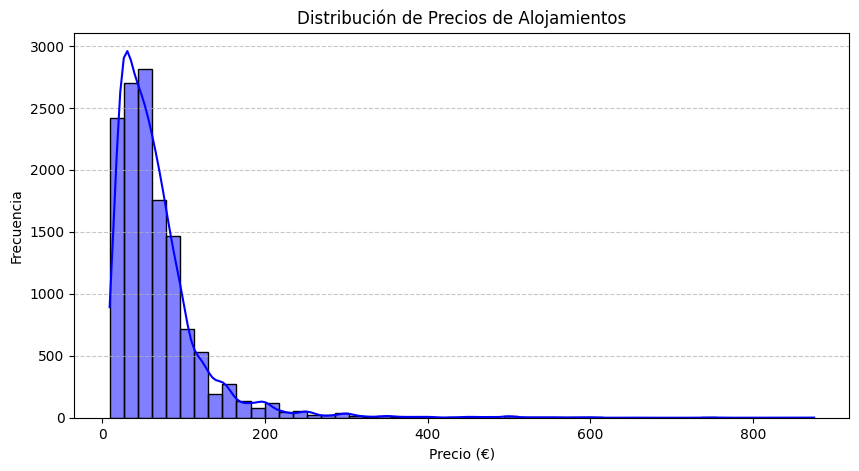

In [16]:
plt.figure(figsize=(10, 5))
sns.histplot(data_v2['Price'], bins=50, kde=True, color='blue')
plt.title('Distribución de Precios de Alojamientos')
plt.xlabel('Precio (€)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Detección de Outliers con Boxplot

Para detectar valores atípicos en el precio, generamos un diagrama de caja (Boxplot). Además, calculamos los percentiles para identificar en qué punto se encuentran los precios más altos:

- El percentil 99 será nuestro **límite superior** para detectar outliers.
- Los valores por encima de este límite podrían distorsionar el modelo.


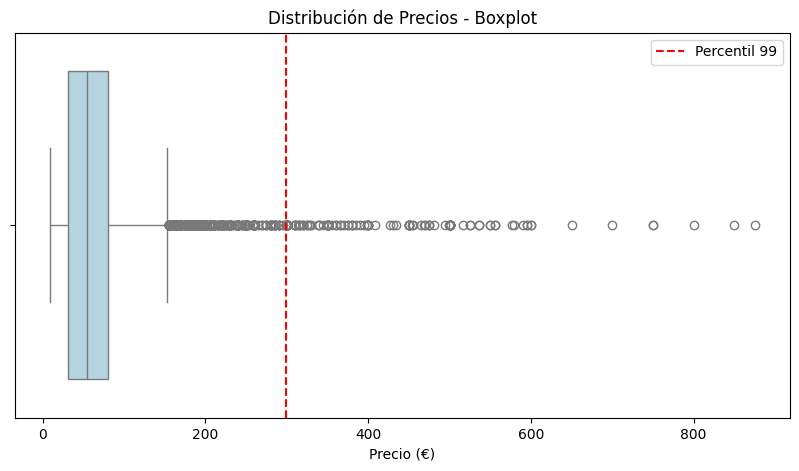

'Percentiles:\n25%: 31.0, 50%: 54.0, 75%: 80.0, 90%: 120.0, 95%: 160.0, 99%: 299.0'

In [17]:
precio_sin_nulos = data_v2['Price'].dropna()


plt.figure(figsize=(10, 5))
sns.boxplot(x=precio_sin_nulos, color='lightblue')
plt.axvline(np.percentile(precio_sin_nulos, 99), color='red', linestyle='--', label='Percentil 99')
plt.title('Distribución de Precios - Boxplot')
plt.xlabel('Precio (€)')
plt.legend()
plt.show()


percentiles = np.percentile(precio_sin_nulos, [25, 50, 75, 90, 95, 99])
f"Percentiles:\n25%: {percentiles[0]}, 50%: {percentiles[1]}, 75%: {percentiles[2]}, 90%: {percentiles[3]}, 95%: {percentiles[4]}, 99%: {percentiles[5]}"


## Eliminación de Outliers

Para evitar distorsiones en el modelo, eliminamos aquellos precios que superan el **percentil 99**, que corresponde a 299€. Esto nos asegura que el modelo no se vea afectado por precios extremadamente altos.


Eliminamos los Outlayers

In [18]:
data_v2 = data_v2[data_v2['Price'] <= 299]


Volvemos a vizualizar

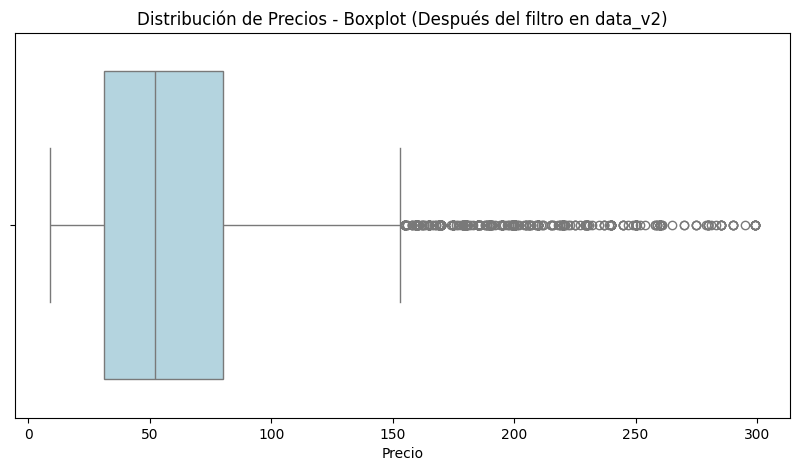

In [19]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=data_v2['Price'], color='lightblue')
plt.title('Distribución de Precios - Boxplot (Después del filtro en data_v2)')
plt.xlabel('Precio')
plt.show()

In [20]:
data_v2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13356 entries, 1 to 14757
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Neighbourhood Cleansed          13356 non-null  object 
 1   City                            13356 non-null  object 
 2   Zipcode                         12913 non-null  object 
 3   Latitude                        13356 non-null  float64
 4   Longitude                       13356 non-null  float64
 5   Property Type                   13356 non-null  object 
 6   Room Type                       13356 non-null  object 
 7   Accommodates                    13356 non-null  int64  
 8   Bathrooms                       13308 non-null  float64
 9   Bedrooms                        13333 non-null  float64
 10  Beds                            13309 non-null  float64
 11  Bed Type                        13356 non-null  object 
 12  Amenities                       13257

Hasta ahora hemos limpiado nuestro dataframe de la siguiente manera:

    - Conceptual.
    - % de nulos.
    - Redundacia de datos
    - Outlayer en price
    

## Imputación de Valores Nulos: Zipcode

Para rellenar los valores nulos de `Zipcode`, utilizamos un método basado en la proximidad geográfica:
- Si un código postal está vacío, buscamos en un rango cercano de **latitud** y **longitud** para encontrar un valor similar.
- El valor asignado será el **más frecuente** en esa zona cercana.

Si no encontramos un valor válido, le asignamos el valor `00000`.

In [21]:
df_known_zip = data_v2[data_v2['Zipcode'].notna()].copy()

def assign_zip_by_proximity(row, ref_df, tolerance=0.005):
    if pd.isna(row['Zipcode']):
        nearby = ref_df[
            (np.abs(ref_df['Latitude'] - row['Latitude']) < tolerance) &
            (np.abs(ref_df['Longitude'] - row['Longitude']) < tolerance)
        ]
        if not nearby.empty:
            return nearby['Zipcode'].mode()[0]
    return row['Zipcode']


data_v2['Zipcode'] = data_v2.apply(lambda row: assign_zip_by_proximity(row, df_known_zip), axis=1)
data_v2['Zipcode'] = data_v2['Zipcode'].fillna('00000')


## Imputación de Valores Nulos en Variables Numéricas

Para rellenar los valores nulos de variables numéricas (`Bathrooms`, `Bedrooms`, `Beds` y `Price`) utilizamos:
- La **mediana**, ya que es más robusta frente a outliers y representa mejor el valor típico.


In [22]:
data_v2['Bathrooms'] = data_v2['Bathrooms'].fillna(data_v2['Bathrooms'].median())
data_v2['Bedrooms'] = data_v2['Bedrooms'].fillna(data_v2['Bedrooms'].median())
data_v2['Beds'] = data_v2['Beds'].fillna(data_v2['Beds'].median())
data_v2['Price'] = data_v2['Price'].fillna(data_v2['Price'].median())

In [23]:
data_v2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13356 entries, 1 to 14757
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Neighbourhood Cleansed          13356 non-null  object 
 1   City                            13356 non-null  object 
 2   Zipcode                         13356 non-null  object 
 3   Latitude                        13356 non-null  float64
 4   Longitude                       13356 non-null  float64
 5   Property Type                   13356 non-null  object 
 6   Room Type                       13356 non-null  object 
 7   Accommodates                    13356 non-null  int64  
 8   Bathrooms                       13356 non-null  float64
 9   Bedrooms                        13356 non-null  float64
 10  Beds                            13356 non-null  float64
 11  Bed Type                        13356 non-null  object 
 12  Amenities                       13257

Las variables Security Deposit y Cleaning Fee presentan bastantes valores nulos, pero considero que ambas pueden influir significativamente en la precisión del modelo al momento de predecir el precio. Antes de imputar estos valores faltantes, vamos a visualizar cómo están distribuidos los datos para entender mejor qué estrategia de imputación podría ser la más adecuada.

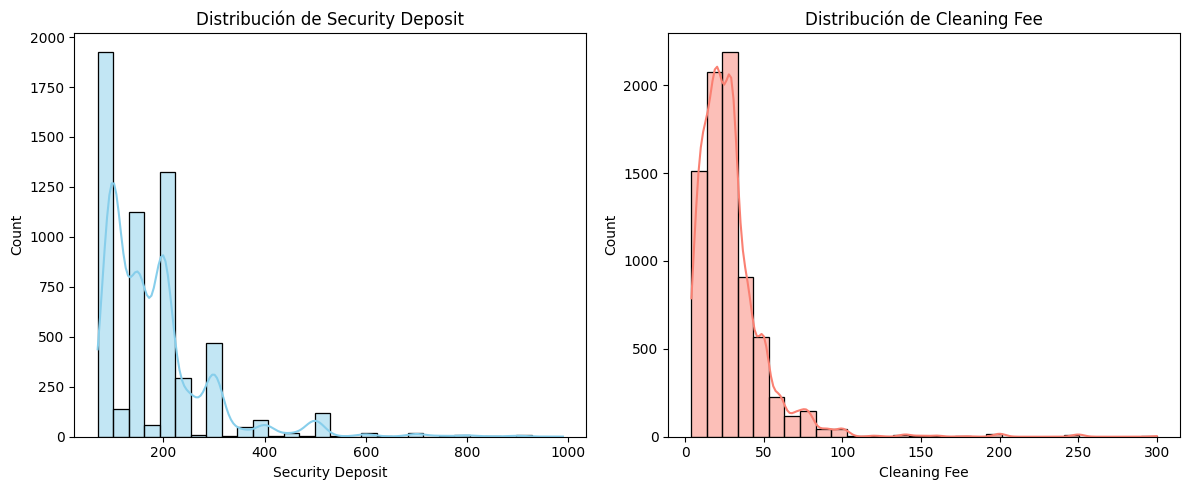

In [24]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data_v2['Security Deposit'], bins=30, kde=True, color='skyblue')
plt.title('Distribución de Security Deposit')
plt.subplot(1, 2, 2)
sns.histplot(data_v2['Cleaning Fee'], bins=30, kde=True, color='salmon')
plt.title('Distribución de Cleaning Fee')

plt.tight_layout()
plt.show()

###  Análisis de outliers:
Para identificar los outliers, generamos un **Boxplot** y calculamos los **percentiles**. 
Los valores por encima del percentil 99 serán considerados como extremos.


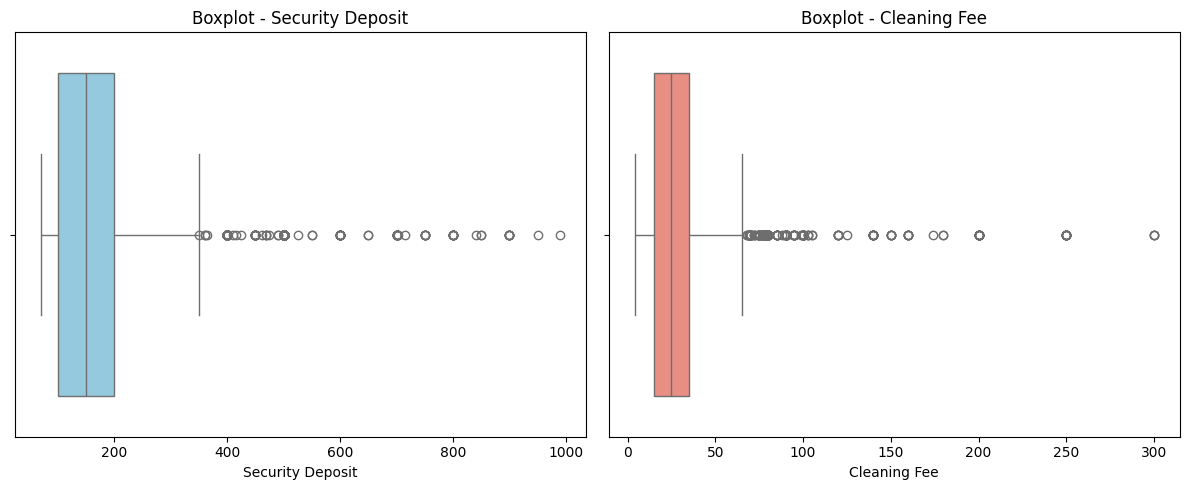

In [25]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=data_v2['Security Deposit'], color='skyblue')
plt.title('Boxplot - Security Deposit')
plt.subplot(1, 2, 2)
sns.boxplot(x=data_v2['Cleaning Fee'], color='salmon')
plt.title('Boxplot - Cleaning Fee')

plt.tight_layout()
plt.show()

percentiles_security = np.percentile(data_v2['Security Deposit'].dropna(), [25, 50, 75, 90, 95, 99])
percentiles_cleaning = np.percentile(data_v2['Cleaning Fee'].dropna(), [25, 50, 75, 90, 95, 99])


In [26]:
f"Percentiles Security Deposit: {percentiles_security}"



'Percentiles Security Deposit: [100. 150. 200. 300. 400. 600.]'

In [27]:

f"Percentiles Cleaning Fee: {percentiles_cleaning}"

'Percentiles Cleaning Fee: [ 15.    25.    35.    50.    69.25 100.  ]'

### Entrenamiento de modelo para imputación:
Para imputar los outliers, utilizaremos un modelo de **K-Neighbors Regressor**.  
Esto se hace para que los valores extremos sean sustituidos por valores estimados basados en otras características similares:
- `Bedrooms`, `Bathrooms`, `Beds`, `Accommodates` y `Price`.

Definimos los límites:
- `Security Deposit` → 600 €
- `Cleaning Fee` → 100 €


In [28]:
features = ['Bedrooms', 'Bathrooms', 'Beds', 'Accommodates', 'Price']

limite_sd = 600
limite_cf = 100

outliers_sd = data_v2[data_v2['Security Deposit'] > limite_sd]
inliers_sd = data_v2[data_v2['Security Deposit'] <= limite_sd]

outliers_cf = data_v2[data_v2['Cleaning Fee'] > limite_cf]
inliers_cf = data_v2[data_v2['Cleaning Fee'] <= limite_cf]

X_train_sd = inliers_sd[features]
y_train_sd = inliers_sd['Security Deposit']
X_test_sd = outliers_sd[features]

X_train_cf = inliers_cf[features]
y_train_cf = inliers_cf['Cleaning Fee']
X_test_cf = outliers_cf[features]

knn_model_sd = KNeighborsRegressor(n_neighbors=5)
knn_model_sd.fit(X_train_sd, y_train_sd)
y_pred_knn_sd = knn_model_sd.predict(X_test_sd)

knn_model_cf = KNeighborsRegressor(n_neighbors=5)
knn_model_cf.fit(X_train_cf, y_train_cf)
y_pred_knn_cf = knn_model_cf.predict(X_test_cf)

data_v2.loc[data_v2['Security Deposit'] > limite_sd, 'Security Deposit'] = y_pred_knn_sd
data_v2.loc[data_v2['Cleaning Fee'] > limite_cf, 'Cleaning Fee'] = y_pred_knn_cf




### Comprobación final:
Visualizamos de nuevo las distribuciones para comprobar si se han corregido los valores extremos.

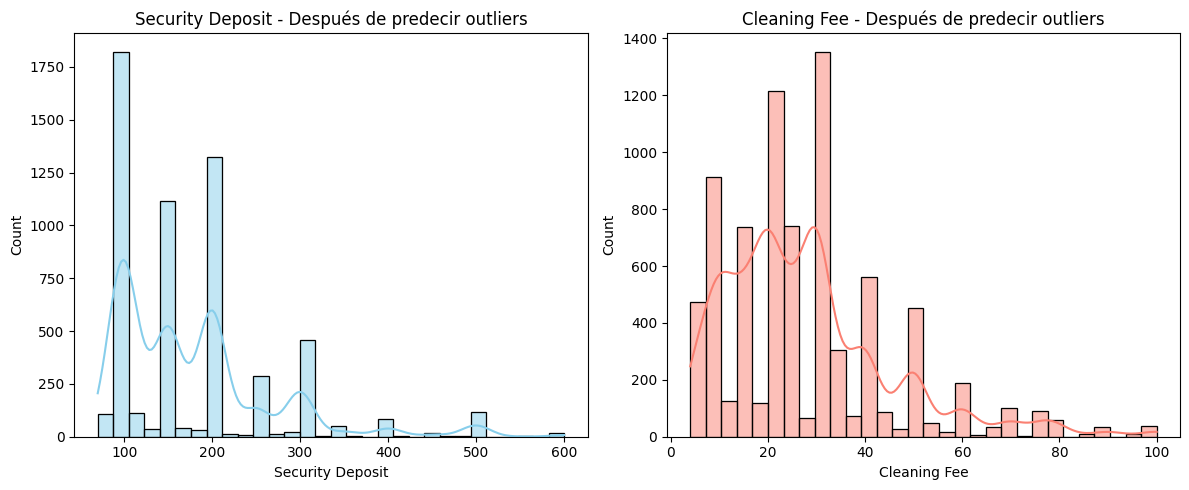

In [29]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data_v2['Security Deposit'], bins=30, kde=True, color='skyblue')
plt.title('Security Deposit - Después de predecir outliers')

plt.subplot(1, 2, 2)
sns.histplot(data_v2['Cleaning Fee'], bins=30, kde=True, color='salmon')
plt.title('Cleaning Fee - Después de predecir outliers')

plt.tight_layout()
plt.show()

## Imputación de Valores Nulos con KNN

Para rellenar los valores nulos en las variables `Security Deposit` y `Cleaning Fee`, utilizaremos un modelo de **K-Neighbors Regressor (KNN)**.  
El modelo se entrena con:
- `Bedrooms`
- `Bathrooms`
- `Beds`
- `Accommodates`
- `Price`

In [30]:
features = ['Bedrooms', 'Bathrooms', 'Beds', 'Accommodates', 'Price']

train_data_sd = data_v2[data_v2['Security Deposit'].notna()]
test_data_sd = data_v2[data_v2['Security Deposit'].isna()]
X_train_sd = train_data_sd[features]
y_train_sd = train_data_sd['Security Deposit']
X_test_sd = test_data_sd[features]


knn_model_sd = KNeighborsRegressor(n_neighbors=5)
knn_model_sd.fit(X_train_sd, y_train_sd)

y_pred_knn_sd = knn_model_sd.predict(X_test_sd)
data_v2.loc[data_v2['Security Deposit'].isna(), 'Security Deposit'] = y_pred_knn_sd


train_data_cf = data_v2[data_v2['Cleaning Fee'].notna()]
test_data_cf = data_v2[data_v2['Cleaning Fee'].isna()]
X_train_cf = train_data_cf[features]
y_train_cf = train_data_cf['Cleaning Fee']
X_test_cf = test_data_cf[features]

knn_model_cf = KNeighborsRegressor(n_neighbors=5)
knn_model_cf.fit(X_train_cf, y_train_cf)

y_pred_knn_cf = knn_model_cf.predict(X_test_cf)
data_v2.loc[data_v2['Cleaning Fee'].isna(), 'Cleaning Fee'] = y_pred_knn_cf


data_v2[['Security Deposit', 'Cleaning Fee']].isnull().sum()


Security Deposit    0
Cleaning Fee        0
dtype: int64

### Comprobación Final de la Imputación

Visualizamos el número de nulos después de la imputación y generamos un histograma para comprobar la distribución.


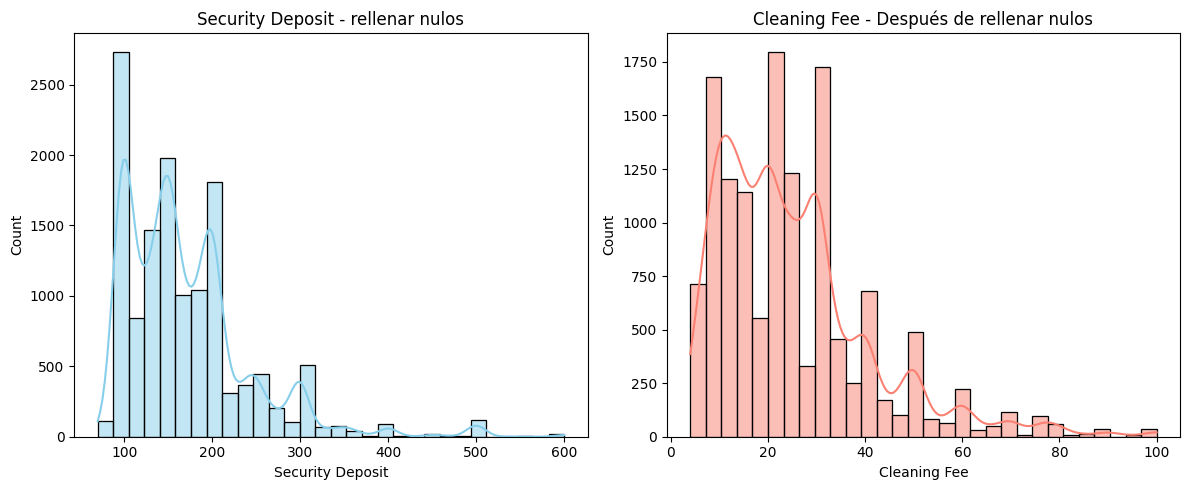

In [31]:

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data_v2['Security Deposit'], bins=30, kde=True, color='skyblue')
plt.title('Security Deposit - rellenar nulos')

plt.subplot(1, 2, 2)
sns.histplot(data_v2['Cleaning Fee'], bins=30, kde=True, color='salmon')
plt.title('Cleaning Fee - Después de rellenar nulos')

plt.tight_layout()
plt.show()

Si revisamos nuestro dataset nos queda Amenities y Reviews per month por imputar los nulos.

In [65]:
data_v2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13356 entries, 1 to 14757
Data columns (total 94 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Latitude                                  13356 non-null  float64
 1   Longitude                                 13356 non-null  float64
 2   Accommodates                              13356 non-null  float64
 3   Bathrooms                                 13356 non-null  float64
 4   Bedrooms                                  13356 non-null  float64
 5   Beds                                      13356 non-null  float64
 6   Price                                     13356 non-null  float64
 7   Security Deposit                          13356 non-null  float64
 8   Cleaning Fee                              13356 non-null  float64
 9   Guests Included                           13356 non-null  float64
 10  Extra People                           

## Imputación de Review Scores

Para las columnas relacionadas con las puntuaciones (`Review Scores`), seguimos un proceso distinto:

- Creamos una columna adicional binaria para cada una, indicando si existe una puntuación (`1`) o no (`0`).
- Imputamos los valores nulos con `-1` para representar que ese alojamiento no ha recibido aún reviews.  



In [32]:
columnas_reviews = [
    'Review Scores Rating', 'Review Scores Accuracy',
    'Review Scores Cleanliness', 'Review Scores Checkin',
    'Review Scores Communication', 'Review Scores Location',
    'Review Scores Value','Reviews per Month'
]

for col in columnas_reviews:
    data_v2[f'Has_{col}'] = data_v2[col].notna().astype(int)
    # Imputar con -1 para representar "No review"
    data_v2[col] = data_v2[col].fillna(-1)




Visualizamos los cambios.

In [33]:
data_v2[columnas_reviews + [f'Has_{col}' for col in columnas_reviews]].head()

,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Reviews per Month,Has_Review Scores Rating,Has_Review Scores Accuracy,Has_Review Scores Cleanliness,Has_Review Scores Checkin,Has_Review Scores Communication,Has_Review Scores Location,Has_Review Scores Value,Has_Reviews per Month
1,80.0,8.0,10.0,10.0,10.0,8.0,10.0,0.86,1,1,1,1,1,1,1,1
2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.00,0,0,0,0,0,0,0,0
3,92.0,10.0,9.0,10.0,10.0,10.0,9.0,1.09,1,1,1,1,1,1,1,1
4,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.00,0,0,0,0,0,0,0,0
5,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.00,0,0,0,0,0,0,0,0


## Imputación de Amenities

Para aprovechar la información de las comodidades de cada alojamiento:

- Extraemos todas las amenities y contamos su frecuencia.  
- Seleccionamos las 20 más comunes (las que tienen más influencia en el usuario).  
- Creamos columnas binarias para indicar su presencia (`1`) o ausencia (`0`).  
- Finalmente, eliminamos la columna original, ya que esa información ya está expandida.  


In [34]:

all_amenities = ','.join(data_v2['Amenities'].dropna()).split(',')
amenities_counter = Counter([amenity.strip() for amenity in all_amenities])
pd.DataFrame(amenities_counter.most_common(20), columns=['Amenity', 'Count'])


,Amenity,Count
0,Wireless Internet,12617
1,Kitchen,12325
2,Heating,12140
3,Essentials,11564
4,Washer,11403
5,TV,10544
6,Hangers,8917
7,Shampoo,8459
8,Elevator in building,8145
9,Family/kid friendly,8021


## Selección de las 20 más comunes:
Las más frecuentes son seleccionadas para crear columnas binarias.  


In [35]:
top_20_amenities = [
    'Wireless Internet', 'Kitchen', 'Heating', 'Essentials',
    'Washer', 'TV', 'Hangers', 'Shampoo', 'Elevator in building',
    'Family/kid friendly', 'Iron', 'Hair dryer', 'Internet',
    'Air conditioning', 'Laptop friendly workspace',
    'Buzzer/wireless intercom', 'Smoking allowed', 
    'First aid kit', '24-hour check-in'
]

for amenity in top_20_amenities:
    data_v2[f'Amenity_{amenity}'] = data_v2['Amenities'].apply(lambda x: 1 if pd.notna(x) and amenity in x else 0)

data_v2 = data_v2.drop(columns=['Amenities'])


In [ ]:
data_v2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13356 entries, 1 to 14757
Data columns (total 62 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Neighbourhood Cleansed             13356 non-null  object 
 1   City                               13356 non-null  object 
 2   Zipcode                            13356 non-null  object 
 3   Latitude                           13356 non-null  float64
 4   Longitude                          13356 non-null  float64
 5   Property Type                      13356 non-null  object 
 6   Room Type                          13356 non-null  object 
 7   Accommodates                       13356 non-null  int64  
 8   Bathrooms                          13356 non-null  float64
 9   Bedrooms                           13356 non-null  float64
 10  Beds                               13356 non-null  float64
 11  Bed Type                           13356 non-null  object 


## Codificación de Variables Categóricas

Para que el modelo de Machine Learning pueda entender las variables categóricas, utilizamos el método de **One-Hot Encoding**.  
Este método transforma cada categoría en una columna binaria, indicando si está presente (`1`) o no (`0`). 

In [37]:
columnas_categoricas = [
    'Neighbourhood Cleansed', 'City', 'Property Type',
    'Room Type', 'Bed Type', 'Cancellation Policy'
]

for col in columnas_categoricas:
    print(f"\n Categorías en '{col}':")
    display(data_v2[col].value_counts())



 Categorías en 'Neighbourhood Cleansed':


Neighbourhood Cleansed
Embajadores                 1837
Universidad                 1350
Palacio                     1069
Sol                          931
Justicia                     773
                            ... 
Sant Martí de Provençals       1
el Baix Guinardó               1
la Font d'en Fargues           1
Porta                          1
la Font de la Guatlla          1
Name: count, Length: 159, dtype: int64


 Categorías en 'City':


City
Madrid       13073
Barcelona      283
Name: count, dtype: int64


 Categorías en 'Property Type':


Property Type
Apartment             11048
House                   954
Condominium             348
Bed & Breakfast         337
Loft                    284
Other                   218
Dorm                     42
Guesthouse               39
Chalet                   23
Hostel                   16
Serviced apartment       13
Townhouse                 8
Boutique hotel            6
Camper/RV                 3
Casa particular           3
Earth House               3
Villa                     3
Guest suite               3
Boat                      2
Tent                      1
Timeshare                 1
Bungalow                  1
Name: count, dtype: int64


 Categorías en 'Room Type':


Room Type
Entire home/apt    8009
Private room       5158
Shared room         189
Name: count, dtype: int64


 Categorías en 'Bed Type':


Bed Type
Real Bed         13061
Pull-out Sofa      239
Futon               36
Couch               15
Airbed               5
Name: count, dtype: int64


 Categorías en 'Cancellation Policy':


Cancellation Policy
strict             5077
flexible           4261
moderate           3994
super_strict_30      19
super_strict_60       5
Name: count, dtype: int64

## One-Hot Encoding:
El método que utilizamos para codificar las categóricas es **OneHotEncoder**:  
- Genera columnas binarias para cada categoría.  
- Evitamos la multicolinealidad eliminando la primera categoría (`drop='first'`).  
- El resultado son nuevas columnas que indican si un registro pertenece o no a esa categoría.  


In [38]:
cols_to_encode = ['City', 'Property Type', 'Room Type', 'Bed Type', 'Cancellation Policy']

encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_data = encoder.fit_transform(data_v2[cols_to_encode])
encoded_cols = encoder.get_feature_names_out(cols_to_encode)


encoded_df = pd.DataFrame(encoded_data, columns=encoded_cols, index=data_v2.index)
data_v2 = pd.concat([data_v2.drop(columns=cols_to_encode), encoded_df], axis=1)


Comprobamos que se han creado las nuevas categorías.

In [39]:
data_v2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13356 entries, 1 to 14757
Data columns (total 89 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Neighbourhood Cleansed               13356 non-null  object 
 1   Zipcode                              13356 non-null  object 
 2   Latitude                             13356 non-null  float64
 3   Longitude                            13356 non-null  float64
 4   Accommodates                         13356 non-null  int64  
 5   Bathrooms                            13356 non-null  float64
 6   Bedrooms                             13356 non-null  float64
 7   Beds                                 13356 non-null  float64
 8   Price                                13356 non-null  float64
 9   Security Deposit                     13356 non-null  float64
 10  Cleaning Fee                         13356 non-null  float64
 11  Guests Included                  

En este punto, me di cuenta de que realizar un encoding de las columnas Zipcode o Neighborhood podría sobredimensionar el DataFrame de manera innecesaria. Esto se debe a que ya contamos con los datos de Latitud y Longitud, que son representaciones geográficas mucho más precisas y suficientes para capturar la localización de cada propiedad.

Otra opción podría haber sido transformar los Zipcode a un valor numérico o float, pero esto generaría una redundancia en la información, ya que los datos espaciales ya están cubiertos por las coordenadas geográficas.

In [40]:
data_v2 = data_v2.drop(columns=['Zipcode','Neighbourhood Cleansed'])

Repetimos el mismo proceso que en Amenities. 

In [41]:

all_features = ','.join(data_v2['Features'].dropna()).split(',')
features_counter = Counter([feature.strip() for feature in all_features])
pd.DataFrame(features_counter.most_common(20), columns=['Feature', 'Count'])

,Feature,Count
0,Requires License,13356
1,Host Has Profile Pic,13307
2,Is Location Exact,8730
3,Host Identity Verified,7688
4,Instant Bookable,5027
5,Host Is Superhost,1557
6,Require Guest Phone Verification,438
7,Require Guest Profile Picture,266


Las más frecuentes son seleccionadas para crear columnas binarias. 

In [42]:

features_to_encode = [
    'Requires License', 'Host Has Profile Pic', 'Is Location Exact',
    'Host Identity Verified', 'Instant Bookable', 'Host Is Superhost',
    'Require Guest Phone Verification', 'Require Guest Profile Picture'
]
for feature in features_to_encode:
    data_v2[f'Feature_{feature}'] = data_v2['Features'].apply(lambda x: 1 if pd.notna(x) and feature in x else 0)

data_v2 = data_v2.drop(columns=['Features'])

In [ ]:
data_v2.info()

## Normalización de Variables Numéricas

Las variables numéricas pueden tener escalas muy distintas.
- Esto puede afectar al modelo, ya que tenderá a dar más peso a las columnas con valores grandes.

Para evitarlo, utilizamos un **StandardScaler** para normalizar:
1 Centramos los datos en torno a la media (`mean = 0`).  
2 Escalamos para que la desviación estándar sea igual a 1 (`std = 1`).  




In [43]:
num_cols = data_v2.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
data_v2[num_cols] = scaler.fit_transform(data_v2[num_cols])

data_v2.describe()


,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,Security Deposit,Cleaning Fee,Guests Included,...,Cancellation Policy_super_strict_30,Cancellation Policy_super_strict_60,Feature_Requires License,Feature_Host Has Profile Pic,Feature_Is Location Exact,Feature_Host Identity Verified,Feature_Instant Bookable,Feature_Host Is Superhost,Feature_Require Guest Phone Verification,Feature_Require Guest Profile Picture
count,1.335600e+04,1.335600e+04,1.335600e+04,1.335600e+04,1.335600e+04,1.335600e+04,1.335600e+04,1.335600e+04,1.335600e+04,1.335600e+04,...,1.335600e+04,1.335600e+04,13356.0,1.335600e+04,1.335600e+04,1.335600e+04,1.335600e+04,1.335600e+04,1.335600e+04,1.335600e+04
mean,2.992834e-14,1.787529e-16,6.064830e-17,-8.618443e-17,-6.330832e-17,5.852029e-17,-5.532828e-17,1.212966e-16,-2.979215e-17,-1.314047e-16,...,-8.512042e-18,4.256021e-18,0.0,-3.617618e-16,-1.383207e-17,-1.383207e-16,3.192016e-17,5.213626e-17,1.276806e-17,3.351617e-17
std,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,...,1.000037e+00,1.000037e+00,0.0,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00
min,-7.739214e-01,-3.110048e-01,-1.137484e+00,-2.186880e+00,-1.635050e+00,-6.698733e-01,-1.251874e+00,-1.393366e+00,-1.323279e+00,-5.387830e-01,...,-3.774398e-02,-1.935210e-02,0.0,-1.647942e+01,-1.373739e+00,-1.164640e+00,-7.768873e-01,-3.632635e-01,-1.841363e-01,-1.425512e-01
25%,-2.187517e-01,-1.592621e-01,-6.122371e-01,-4.213013e-01,-3.581392e-01,-6.698733e-01,-7.462219e-01,-7.285621e-01,-7.626665e-01,-5.387830e-01,...,-3.774398e-02,-1.935210e-02,0.0,6.068173e-02,-1.373739e+00,-1.164640e+00,-7.768873e-01,-3.632635e-01,-1.841363e-01,-1.425512e-01
50%,-1.556710e-01,-1.518035e-01,-6.122371e-01,-4.213013e-01,-3.581392e-01,-6.698733e-01,-2.635541e-01,-2.853596e-01,-2.643440e-01,-5.387830e-01,...,-3.774398e-02,-1.935210e-02,0.0,6.068173e-02,7.279402e-01,8.586343e-01,-7.768873e-01,-3.632635e-01,-1.841363e-01,-1.425512e-01
75%,-8.665137e-02,-1.414106e-01,4.382561e-01,-4.213013e-01,9.187715e-01,3.316205e-02,3.800031e-01,4.071443e-01,2.962689e-01,4.169861e-01,...,-3.774398e-02,-1.935210e-02,0.0,6.068173e-02,7.279402e-01,8.586343e-01,1.287188e+00,-3.632635e-01,-1.841363e-01,-1.425512e-01
max,7.046864e+00,6.859450e+00,6.741215e+00,1.193775e+01,1.113406e+01,9.875657e+00,5.413540e+00,5.947175e+00,4.656591e+00,1.379775e+01,...,2.649429e+01,5.167398e+01,0.0,6.068173e-02,7.279402e-01,8.586343e-01,1.287188e+00,2.752823e+00,5.430760e+00,7.015021e+00


## Análisis de Correlación entre Variables

Para optimizar el modelo, calculamos la **matriz de correlación** entre todas las variables, con especial interés en:
- Identificar las variables que más influyen en el `Price`.  
- Detectar relaciones fuertes entre variables (colinealidad).

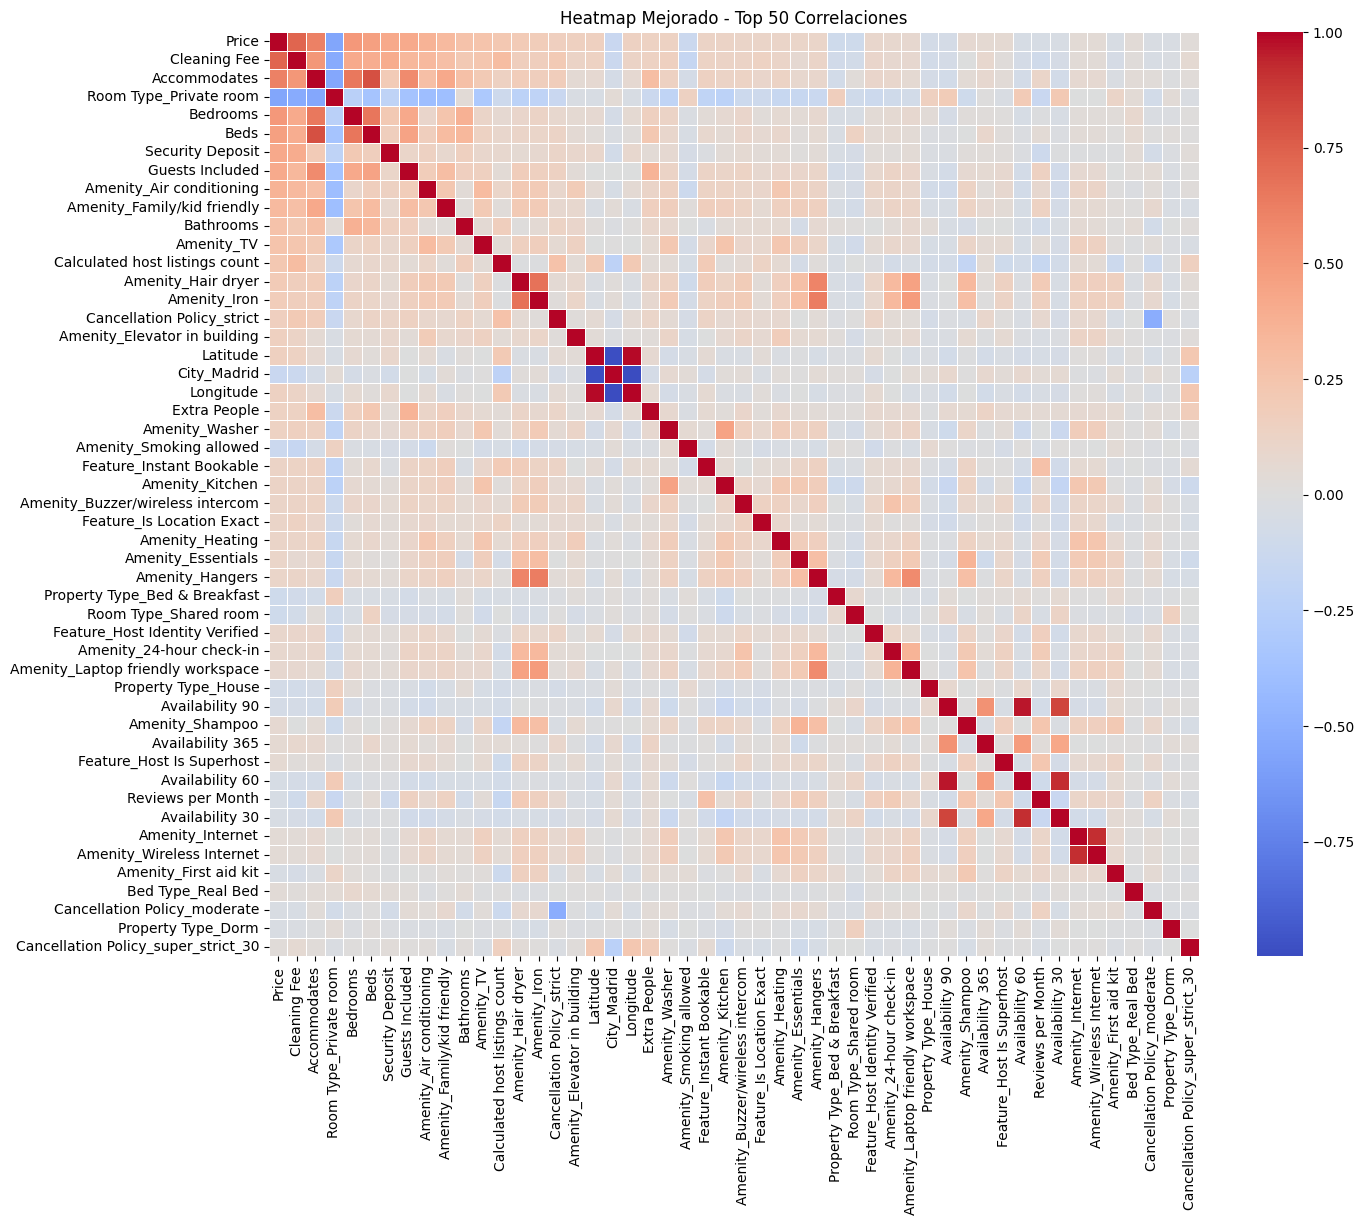

In [44]:
correlation_matrix = data_v2.corr()
corr_target = correlation_matrix['Price'].abs().sort_values(ascending=False)
top_features = corr_target.index[:50]
corr_top = correlation_matrix.loc[top_features, top_features]

plt.figure(figsize=(15, 12))
sns.heatmap(corr_top, annot=False, cmap='coolwarm', linewidths=0.5, linecolor='white')
plt.title('Heatmap Mejorado - Top 50 Correlaciones')
plt.show()


Selecionamos las Feautres más importantes y generamos un nuevo dataset para entrenar los modelos.

In [ ]:
correlation_matrix = data_v2.corr()
price_corr = correlation_matrix['Price'].abs().sort_values(ascending=False)
umbral = 0.05
features_importantes = price_corr[price_corr > umbral].index.tolist()
data_v3 = data_v2[features_importantes]


In [64]:
data_v3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13356 entries, 1 to 14757
Data columns (total 42 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Price                              13356 non-null  float64
 1   Cleaning Fee                       13356 non-null  float64
 2   Accommodates                       13356 non-null  float64
 3   Room Type_Private room             13356 non-null  float64
 4   Bedrooms                           13356 non-null  float64
 5   Beds                               13356 non-null  float64
 6   Security Deposit                   13356 non-null  float64
 7   Guests Included                    13356 non-null  float64
 8   Amenity_Air conditioning           13356 non-null  float64
 9   Amenity_Family/kid friendly        13356 non-null  float64
 10  Bathrooms                          13356 non-null  float64
 11  Amenity_TV                         13356 non-null  float64


## División del Dataset en Entrenamiento y Prueba

Para evaluar correctamente el modelo y evitar sobreajuste (**overfitting**), dividimos los datos en dos partes:  
- `X` → Variables predictoras seleccionadas en el análisis de correlación.  
- `y` → Variable objetivo: **Price**.  

La división se realiza en un **80% para entrenamiento** y un **20% para prueba**.  
Esto permite que el modelo se entrene con una muestra representativa y se evalúe con datos no vistos.  


In [47]:
X = data_v3.drop(columns=['Price'])
y = data_v3['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)





In [48]:
X_train.shape

(10684, 41)

In [49]:
X_test.shape

(2672, 41)

## Entrenamiento con Regresión Lineal

Para un primer acercamiento, utilizamos un modelo de **Regresión Lineal**.  
El objetivo es observar cómo se comportan las variables predictoras para estimar el (`Price`).  

###  Pasos realizados:
1 Inicialización del modelo.  
2 Entrenamiento con el conjunto de entrenamiento (`X_train`, `y_train`).  
3 Predicción en el conjunto de prueba (`X_test`).  
4 Evaluación del modelo con métricas de error:  
   - **MAE** → Mean Absolute Error  
   - **MSE** → Mean Squared Error  
   - **RMSE** → Root Mean Squared Error  
   - **R2** → R-squared, coeficiente de determinación  


In [50]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print(f" Mean Absolute Error (MAE): {mae:.2f}")
print(f" Mean Squared Error (MSE): {mse:.2f}")
print(f" Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f" R-squared (R2): {r2:.4f}")


 Mean Absolute Error (MAE): 0.37
 Mean Squared Error (MSE): 0.32
 Root Mean Squared Error (RMSE): 0.56
 R-squared (R2): 0.6802


## Visualización de Predicciones vs Valores Reales

Para evaluar el rendimiento del modelo, generamos un gráfico de dispersión donde:  
- Los puntos azules representan las predicciones realizadas por el modelo.  
- La línea roja discontinua representa el comportamiento ideal, donde predicción y valor real coinciden exactamente.  

La proximidad de los puntos a la línea roja nos muestra el nivel de acierto del modelo.  


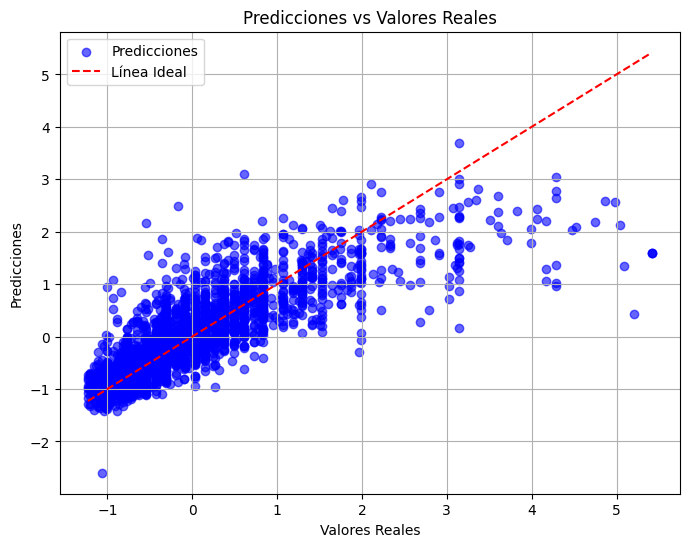

In [51]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Línea Ideal')
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.legend()
plt.grid(True)
plt.show()


## Análisis del gráfico:
- Los puntos azules deberían estar alineados sobre la línea roja para un modelo perfecto.  
- Vemos una buena concentración alrededor de la línea, pero también algo de dispersión en valores altos y bajos.  
- Esto indica que el modelo tiene un buen desempeño, pero puede mejorar.  


## Entrenamiento y Análisis con Random Forest Regressor

Para mejorar el rendimiento del modelo, utilizamos **Random Forest Regressor**

- Es un método basado en múltiples árboles de decisión.  
- Es robusto contra sobreajuste.  
- Permite identificar las variables más importantes en el modelo.  

Además, se aplica un proceso de **Cross-Validation (5-fold)** para validar el modelo de forma más robusta.  


In [52]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)


mae_scores = -cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_absolute_error')
mse_scores = -cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')


print(f" Mean Absolute Error (MAE) Promedio: {np.mean(mae_scores):.2f}")
print(f" Mean Squared Error (MSE) Promedio: {np.mean(mse_scores):.2f}")
print(f" R-squared (R2) Promedio: {np.mean(r2_scores):.4f}")

 Mean Absolute Error (MAE) Promedio: 0.28
 Mean Squared Error (MSE) Promedio: 0.22
 R-squared (R2) Promedio: 0.7793


In [53]:
rf_model.fit(X, y)
importances = rf_model.feature_importances_
features = X.columns


feature_importances = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


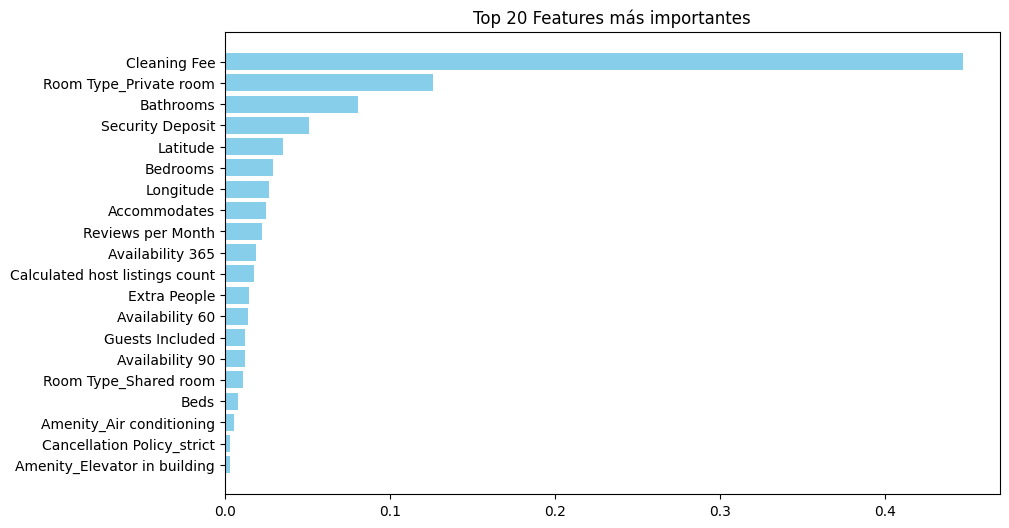

,Feature,Importance
0,Cleaning Fee,0.447463
2,Room Type_Private room,0.126144
9,Bathrooms,0.080651
5,Security Deposit,0.050933
16,Latitude,0.035181
3,Bedrooms,0.028957
18,Longitude,0.026546
1,Accommodates,0.024875
40,Reviews per Month,0.022610
37,Availability 365,0.019148


In [54]:

plt.figure(figsize=(10, 6))
plt.barh(feature_importances.head(20)['Feature'], feature_importances.head(20)['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.title('Top 20 Features más importantes')
plt.show()

feature_importances.head(20)


## Optimización de Hiperparámetros con GridSearchCV

Para encontrar los mejores parámetros del modelo **RandomForestRegressor**, utilizamos:
- `n_estimators`: Número de árboles en el bosque.  
- `max_depth`: Máxima profundidad de los árboles.  
- `min_samples_split`: Mínimo de muestras para dividir un nodo.  
- `min_samples_leaf`: Mínimo de muestras en cada hoja.  

**GridSearchCV** se encarga de:

1 Probar todas las combinaciones del espacio de búsqueda.  
2 Evaluar el rendimiento con Cross-Validation (5 folds).  
3 Seleccionar los mejores parámetros para el modelo final.  


**Advertencia:**

El proceso de búsqueda de hiperparámetros a través de técnicas como GridSearchCV puede llegar a ser bastante costoso en términos de tiempo de ejecución, especialmente cuando se evalúan múltiples combinaciones. Si dispones de un procesador potente o una máquina con múltiples núcleos, puedes optimizar el proceso aumentando el valor de n_jobs. Este parámetro permite paralelizar la búsqueda y reducir significativamente el tiempo de espera.

In [ ]:
rf_model = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

# 🔍 Mostrar los mejores parámetros
print(f" Mejores parámetros encontrados: {grid_search.best_params_}")
print(f" Mejor puntuación (MAE negativo): {-grid_search.best_score_:.2f}")


# Entrenamiento del Modelo Optimizado

Con los mejores parámetros obtenidos en el paso anterior:
- `max_depth`: 20  
- `min_samples_leaf`: 2  
- `min_samples_split`: 2  
- `n_estimators`: 300  

In [55]:
best_rf_model = RandomForestRegressor(
    max_depth=20,
    min_samples_leaf=2,
    min_samples_split=2,
    n_estimators=300,
    random_state=42
)

best_rf_model.fit(X_train, y_train)
y_pred_optimized = best_rf_model.predict(X_test)


mae_optimized = mean_absolute_error(y_test, y_pred_optimized)
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
rmse_optimized = np.sqrt(mse_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

print(f" Mean Absolute Error (MAE): {mae_optimized:.2f}")
print(f" Mean Squared Error (MSE): {mse_optimized:.2f}")
print(f" Root Mean Squared Error (RMSE): {rmse_optimized:.2f}")
print(f" R-squared (R2): {r2_optimized:.4f}")


 Mean Absolute Error (MAE): 0.27
 Mean Squared Error (MSE): 0.21
 Root Mean Squared Error (RMSE): 0.46
 R-squared (R2): 0.7850


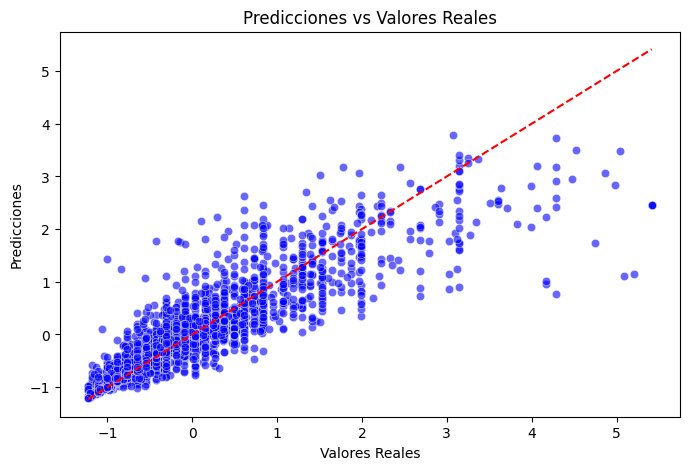

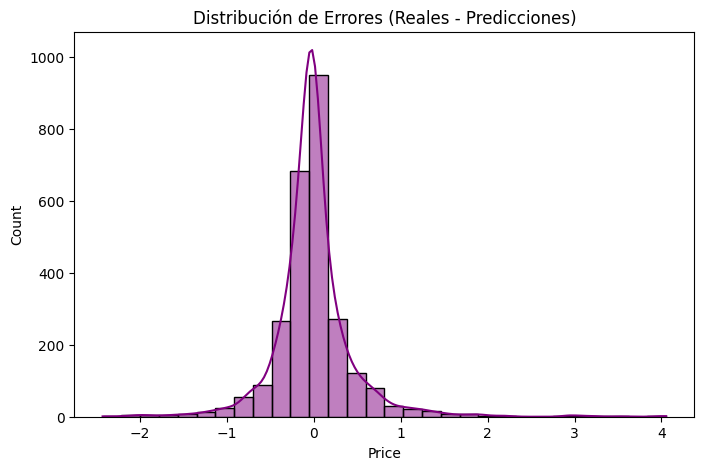

In [56]:

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred_optimized, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(y_test - y_pred_optimized, bins=30, kde=True, color='purple')
plt.title('Distribución de Errores (Reales - Predicciones)')
plt.show()


###  Conclusión Final:
El modelo funciona bastante bien en general. Como se puede ver en las gráficas, la mayoría de las predicciones están cercanas a los valores reales y los errores son generalmente bajos. Las métricas (MAE, MSE, RMSE y R²) también confirman que tenemos un modelo bastante sólido que logra capturar buena parte de la información de los datos. A pesar de esto, hay ciertos valores extremos que siguen dando problemas. Estos casos podrían beneficiarse de una mejor selección de variables, mayor cantidad de datos, o modelos más avanzados que capturen mejor esas particularidades.
